# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [69]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as ow

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

settings = {"units": "imperial", "appid": api_key}

## Generate Cities List

In [70]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

In [72]:
cities_df = pd.DataFrame({'City':cities})
cities_df.head()

,City
0,stoyba
1,ushuaia
2,saskylakh
3,thinadhoo
4,ketchikan


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [84]:
weather_data = []
for index, row in cities_df.iterrows():
    
    try:
        print(row[0])
        weather_data.append(ow.get_current(row[0], **settings))
    except:
        cities_df.drop(index, inplace=True)

ushuaia
saskylakh
thinadhoo
ketchikan
arraial do cabo
punta arenas
rikitea
lazaro cardenas
busselton
vostok
jamestown
bethel
puerto ayora
joshimath
kawalu
vestmannaeyjar
kyabram
flinders
rodino
constitucion
cabra
lasa
smithers
at-bashi
tasiilaq
sept-iles
hilo
port alfred
chuy
barrow
esperance
khatanga
san patricio
coihaique
saldanha
hami
airai
port blair
doctor arroyo
kumluca
cape town
avarua
tuatapere
bafq
diamantino
poum
port macquarie
rio gallegos
vaini
qaanaaq
panna
gazanjyk
torbay
mataura
sitka
nikolskoye
cherskiy
mahebourg
souillac
ballina
escanaba
dwarka
makat
butaritari
cayenne
griffith
semnan
castro
san policarpo
hauterive
paris
thompson
golden
matara
valdivia
natal
darnetal
georgetown
vao
nizhniy bestyakh
ust-nera
micheweni
mar del plata
gillette
okhotsk
yerbogachen
jacareacanga
talnakh
egvekinot
majene
fayetteville
hermanus
narsaq
hasaki
palmerston
hobart
upernavik
petukhovo
carnot
laguna
san quintin
sambava
khao wong
lavrentiya
saint-philippe
yellowknife
port augusta
bluff


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [85]:
summary = ["name","sys.country","main.temp","main.temp_max", "coord.lat", "coord.lon","main.humidity",
           "wind.speed","clouds.all","dt"]
city_name = cities_df['City'].values

data = [response(*summary) for response in weather_data]

column_names = ['City','Country','Temperature','Maximum Temperature', 'Latitude', 'Longitude','Humidity',
                'Wind Speed','Cloudiness','Date']

weather_df = pd.DataFrame(data,columns=column_names)
weather_df

,City,Country,Temperature,Maximum Temperature,Latitude,Longitude,Humidity,Wind Speed,Cloudiness,Date
0,Ushuaia,AR,46.40,46.40,-54.81,-68.31,97,10.29,40,1572577762
1,Saskylakh,RU,-0.26,-0.26,71.97,114.09,97,1.34,100,1572577762
2,Thinadhoo,MV,81.23,81.23,0.53,72.93,80,11.72,98,1572577763
3,Ketchikan,US,47.19,48.20,55.34,-131.65,87,1.52,90,1572577763
4,Arraial do Cabo,BR,74.89,74.89,-22.97,-42.02,90,6.55,23,1572577763
...,...,...,...,...,...,...,...,...,...,...
551,Alikalia,SL,68.85,68.85,9.15,-11.39,91,1.50,100,1572577859
552,Brewster,US,66.49,69.80,41.76,-70.08,88,13.87,90,1572577859
553,Tabas,IR,53.60,53.60,33.60,56.92,62,2.24,42,1572577860
554,Praia,BR,71.60,71.60,-20.25,-43.81,73,2.59,85,1572577860


In [92]:
weather_csv = weather_df.to_csv ('weather_csv.csv', index = None, header=True)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

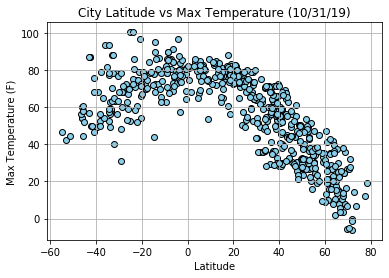

In [86]:
plt.scatter(weather_df["Latitude"], weather_df["Temperature"], marker="o",color='skyblue',edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature (10/31/19)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs Max Temperature.png")

# Show plot
plt.show()

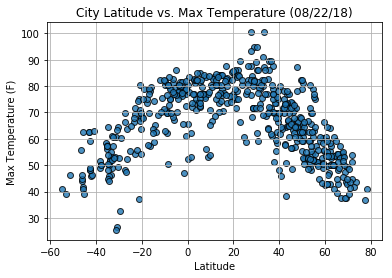

#### Latitude vs. Humidity Plot

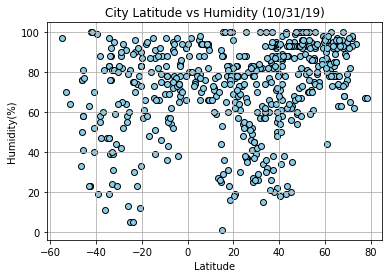

In [87]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker="o",color='skyblue',edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity (10/31/19)")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs Humidity.png")

# Show plot
plt.show()

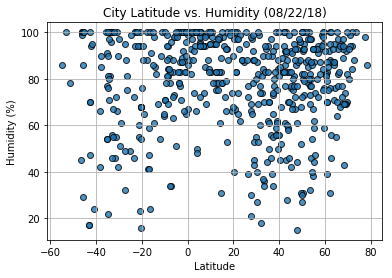

#### Latitude vs. Cloudiness Plot

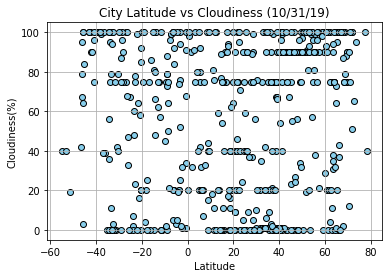

In [88]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker="o",color='skyblue',edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness (10/31/19)")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs Cloudiness.png")

# Show plot
plt.show()

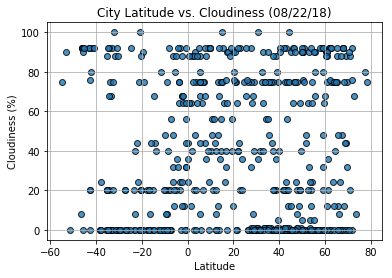

#### Latitude vs. Wind Speed Plot

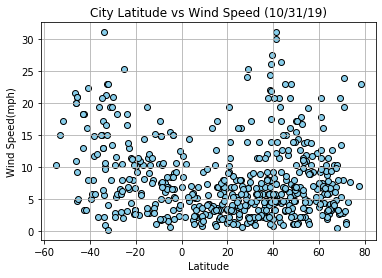

In [89]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker="o",color='skyblue',edgecolor='black')

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed (10/31/19)")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("City Latitude vs Wind Speed.png")

# Show plot
plt.show()

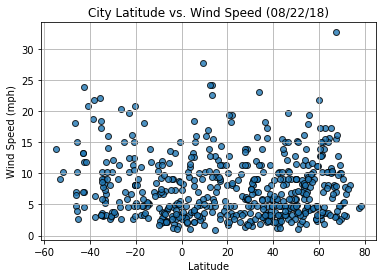

In [ ]:
Observable trends
1.The temperature tends to increase near the equator and decreases as you go towards the either poles.
2.Humidity increases as you go towards the north pole.
3.Most cities have low wind speed on either side of the eqauator. 